#  <center> Pandas <center>

In [1]:
import numpy as np
import pandas as pd

In [2]:
#全部行都能输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## DataFrame数据结构

DataFrame是一个可以包含不同数据类型列的二维数据结构，类似于电子表格或SQL表，或Series对象的字典集合,是最常用的pandas对象。 

### 创建DataFrame

和 Series 类似，创建 DataFrame 时，也接受许多不同类的参数。虽然在绝大多数情况下，我们通过读取文件来创建 DataFrame。
DataFrame 可以从序列类的数据构建：

#### 方法一 : 使用包含列表的类字典创建

In [3]:
#使用包含列表的字典创建DataFrame时,各个列表内元素个数必须一致
data1 = {'员工姓名':['赵一','钱明','周元'],   #默认字典的键为dataframe的字段名,不设定索引的时候,自动给出默认索引,从0到len(list)-1
       '销售业绩':[30000,20000,50000],
       '提成收入':[6000,4000,10000]}
df1 = pd.DataFrame(data1)
df1

,员工姓名,销售业绩,提成收入
0,赵一,30000,6000
1,钱明,20000,4000
2,周元,50000,10000


#### 方法二 : 使用包含series的类字典形式创建DataFranme

In [4]:
data = {'员工姓名':pd.Series(['赵一','钱明','周元','李雷']),  #与第一种创建方式相比,各series中的元素个数可以不一致
       '销售业绩':pd.Series([30000,20000,50000]),
       '提成收入':pd.Series([6000,4000,10000])}
df2 = pd.DataFrame(data)
df2

,员工姓名,销售业绩,提成收入
0,赵一,30000.0,6000.0
1,钱明,20000.0,4000.0
2,周元,50000.0,10000.0
3,李雷,NaN,NaN


In [5]:
data = {'员工姓名':pd.Series(['赵一','钱明','周元','李雷'],index = ['001','002','003','004']),  #指定index与不指定index的区别
       '销售业绩':pd.Series([30000,20000,50000],index = ['001','002','003']),
       '提成收入':pd.Series([6000,4000,10000],index = ['001','002','003'])}
df2 = pd.DataFrame(data)
df2

,员工姓名,销售业绩,提成收入
001,赵一,30000.0,6000.0
002,钱明,20000.0,4000.0
003,周元,50000.0,10000.0
004,李雷,NaN,NaN


In [6]:
pd.DataFrame(df2, index=['003', '001', '002'])  #创建的时候可以只用一部分index,而且index与记录一一对应

,员工姓名,销售业绩,提成收入
003,周元,50000.0,10000.0
001,赵一,30000.0,6000.0
002,钱明,20000.0,4000.0


In [7]:
pd.DataFrame(df2, index=['003', '001', '002'],   #列名(columns)可以进行指定.如果指定了不存在的列,dataframe会自动用空值补齐
             columns=['提成收入', '基本工资'])

,提成收入,基本工资
003,10000.0,NaN
001,6000.0,NaN
002,4000.0,NaN


除上述两种创建方法,DataFrame还有其他创建方法,实际工作中获取 DataFrame 的主要方法是读取表结构的文件，其他创建方法不一一列出

**访问索引和列名**

In [8]:
df2

,员工姓名,销售业绩,提成收入
001,赵一,30000.0,6000.0
002,钱明,20000.0,4000.0
003,周元,50000.0,10000.0
004,李雷,NaN,NaN


In [9]:
df2.index   #访问索引   在外部数据导入后,可以用访问索引和列名的方法对数据有有一个大概的了解

Index(['001', '002', '003', '004'], dtype='object')

In [10]:
df2.columns #访问列名

Index(['员工姓名', '销售业绩', '提成收入'], dtype='object')

### DataFrame 列操作
DataFrame 列的选取，设置和删除列的工作原理与类似的 dict 操作相同。

In [11]:
df2

,员工姓名,销售业绩,提成收入
001,赵一,30000.0,6000.0
002,钱明,20000.0,4000.0
003,周元,50000.0,10000.0
004,李雷,NaN,NaN


In [12]:
df2["员工姓名"]   #单独一个列是series数据结构

001    赵一
002    钱明
003    周元
004    李雷
Name: 员工姓名, dtype: object

#### 增加列

In [13]:
df2['基本工资'] = 2500  #增加一列并且给增加的列赋值,如果赋值为单个标量,会自动在列里广播填充
df2

,员工姓名,销售业绩,提成收入,基本工资
001,赵一,30000.0,6000.0,2500
002,钱明,20000.0,4000.0,2500
003,周元,50000.0,10000.0,2500
004,李雷,NaN,NaN,2500


In [14]:
df2["创造收益"] = df2['销售业绩'] - df2['提成收入'] - df2['基本工资']  #增加一列并且给增加的列赋值,赋值可以是已存在列之间的聚合运算

In [15]:
df2

,员工姓名,销售业绩,提成收入,基本工资,创造收益
001,赵一,30000.0,6000.0,2500,21500.0
002,钱明,20000.0,4000.0,2500,13500.0
003,周元,50000.0,10000.0,2500,37500.0
004,李雷,NaN,NaN,2500,NaN


In [16]:
df2["是否达标"] = df2['创造收益'] > 20000  #增加一列并且给增加的列赋值,赋值可以是对其中某一列的布尔判断
df2

,员工姓名,销售业绩,提成收入,基本工资,创造收益,是否达标
001,赵一,30000.0,6000.0,2500,21500.0,True
002,钱明,20000.0,4000.0,2500,13500.0,False
003,周元,50000.0,10000.0,2500,37500.0,True
004,李雷,NaN,NaN,2500,NaN,False


In [17]:
df2['公司名称'] = '脑洞大开有限公司'   ##增加一列并且给增加的列赋值,赋值为标量,会自动在列里广播填充.填充的数值类型也可以是字符串类型
df2

,员工姓名,销售业绩,提成收入,基本工资,创造收益,是否达标,公司名称
001,赵一,30000.0,6000.0,2500,21500.0,True,脑洞大开有限公司
002,钱明,20000.0,4000.0,2500,13500.0,False,脑洞大开有限公司
003,周元,50000.0,10000.0,2500,37500.0,True,脑洞大开有限公司
004,李雷,NaN,NaN,2500,NaN,False,脑洞大开有限公司


In [18]:
#如果新增的列中传入的是 Series 并且索引不完全相同，那么会默认按照索引对齐,没有指定填充值的位置默认用空值进行填充：
df2['性别'] = pd.Series(['女','男'],index = ['001','003'])
df2

,员工姓名,销售业绩,提成收入,基本工资,创造收益,是否达标,公司名称,性别
001,赵一,30000.0,6000.0,2500,21500.0,True,脑洞大开有限公司,女
002,钱明,20000.0,4000.0,2500,13500.0,False,脑洞大开有限公司,NaN
003,周元,50000.0,10000.0,2500,37500.0,True,脑洞大开有限公司,男
004,李雷,NaN,NaN,2500,NaN,False,脑洞大开有限公司,NaN


insert方法插入列

In [19]:
df2.insert(5,"年龄",[25,32,30,24])  #插入列,参数为指定插入位置,插入列的列名,给插入的列赋值,赋值的内容可以是列表
df2

,员工姓名,销售业绩,提成收入,基本工资,创造收益,年龄,是否达标,公司名称,性别
001,赵一,30000.0,6000.0,2500,21500.0,25,True,脑洞大开有限公司,女
002,钱明,20000.0,4000.0,2500,13500.0,32,False,脑洞大开有限公司,NaN
003,周元,50000.0,10000.0,2500,37500.0,30,True,脑洞大开有限公司,男
004,李雷,NaN,NaN,2500,NaN,24,False,脑洞大开有限公司,NaN


In [20]:
df2.insert(0,"工龄","1年")  #插入列并给插入的列赋值,赋值的内容可以是标量
df2

,工龄,员工姓名,销售业绩,提成收入,基本工资,创造收益,年龄,是否达标,公司名称,性别
001,1年,赵一,30000.0,6000.0,2500,21500.0,25,True,脑洞大开有限公司,女
002,1年,钱明,20000.0,4000.0,2500,13500.0,32,False,脑洞大开有限公司,NaN
003,1年,周元,50000.0,10000.0,2500,37500.0,30,True,脑洞大开有限公司,男
004,1年,李雷,NaN,NaN,2500,NaN,24,False,脑洞大开有限公司,NaN


In [21]:
df2.insert(5,"社保金额",df2["基本工资"]*0.05)  #插入列并给插入的列赋值,赋值的内容也可以是series(获取的列其数据结构是series)
df2

,工龄,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,年龄,是否达标,公司名称,性别
001,1年,赵一,30000.0,6000.0,2500,125.0,21500.0,25,True,脑洞大开有限公司,女
002,1年,钱明,20000.0,4000.0,2500,125.0,13500.0,32,False,脑洞大开有限公司,NaN
003,1年,周元,50000.0,10000.0,2500,125.0,37500.0,30,True,脑洞大开有限公司,男
004,1年,李雷,NaN,NaN,2500,125.0,NaN,24,False,脑洞大开有限公司,NaN


#### 删除或移出列

In [22]:
del df2["工龄"]   #直接在原数据集上做修改
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,年龄,是否达标,公司名称,性别
001,赵一,30000.0,6000.0,2500,125.0,21500.0,25,True,脑洞大开有限公司,女
002,钱明,20000.0,4000.0,2500,125.0,13500.0,32,False,脑洞大开有限公司,NaN
003,周元,50000.0,10000.0,2500,125.0,37500.0,30,True,脑洞大开有限公司,男
004,李雷,NaN,NaN,2500,125.0,NaN,24,False,脑洞大开有限公司,NaN


In [23]:
df2.pop("年龄")  #抛出指定列并对原数据进行改变

001    25
002    32
003    30
004    24
Name: 年龄, dtype: int64

In [24]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别
001,赵一,30000.0,6000.0,2500,125.0,21500.0,True,脑洞大开有限公司,女
002,钱明,20000.0,4000.0,2500,125.0,13500.0,False,脑洞大开有限公司,NaN
003,周元,50000.0,10000.0,2500,125.0,37500.0,True,脑洞大开有限公司,男
004,李雷,NaN,NaN,2500,125.0,NaN,False,脑洞大开有限公司,NaN


In [25]:
df2.drop(columns=['是否达标'],axis=1)  #返回一个副本,原数据没有发生改变

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,公司名称,性别
001,赵一,30000.0,6000.0,2500,125.0,21500.0,脑洞大开有限公司,女
002,钱明,20000.0,4000.0,2500,125.0,13500.0,脑洞大开有限公司,NaN
003,周元,50000.0,10000.0,2500,125.0,37500.0,脑洞大开有限公司,男
004,李雷,NaN,NaN,2500,125.0,NaN,脑洞大开有限公司,NaN


In [26]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别
001,赵一,30000.0,6000.0,2500,125.0,21500.0,True,脑洞大开有限公司,女
002,钱明,20000.0,4000.0,2500,125.0,13500.0,False,脑洞大开有限公司,NaN
003,周元,50000.0,10000.0,2500,125.0,37500.0,True,脑洞大开有限公司,男
004,李雷,NaN,NaN,2500,125.0,NaN,False,脑洞大开有限公司,NaN


#### 分配列的操作
assign方法,依据现有列派生的新列

In [27]:
df2.assign(利润率 = df2.创造收益/df2.销售业绩)  #和前边单纯的插入或新增列的操作不同,assign方法不会改变原数据

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,利润率
001,赵一,30000.0,6000.0,2500,125.0,21500.0,True,脑洞大开有限公司,女,0.716667
002,钱明,20000.0,4000.0,2500,125.0,13500.0,False,脑洞大开有限公司,NaN,0.675000
003,周元,50000.0,10000.0,2500,125.0,37500.0,True,脑洞大开有限公司,男,0.750000
004,李雷,NaN,NaN,2500,125.0,NaN,False,脑洞大开有限公司,NaN,NaN


In [28]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别
001,赵一,30000.0,6000.0,2500,125.0,21500.0,True,脑洞大开有限公司,女
002,钱明,20000.0,4000.0,2500,125.0,13500.0,False,脑洞大开有限公司,NaN
003,周元,50000.0,10000.0,2500,125.0,37500.0,True,脑洞大开有限公司,男
004,李雷,NaN,NaN,2500,125.0,NaN,False,脑洞大开有限公司,NaN


In [29]:
df2.assign(利润率 = df2.创造收益/df2.销售业绩,  #assign方法可以同时分配多列,想要捕捉到分配列之后的dataframe,赋值新的dataframe名字给它
           成本率 = (df2.提成收入+df2.基本工资)/df2.销售业绩)  

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,利润率,成本率
001,赵一,30000.0,6000.0,2500,125.0,21500.0,True,脑洞大开有限公司,女,0.716667,0.283333
002,钱明,20000.0,4000.0,2500,125.0,13500.0,False,脑洞大开有限公司,NaN,0.675000,0.325000
003,周元,50000.0,10000.0,2500,125.0,37500.0,True,脑洞大开有限公司,男,0.750000,0.250000
004,李雷,NaN,NaN,2500,125.0,NaN,False,脑洞大开有限公司,NaN,NaN,NaN


In [30]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别
001,赵一,30000.0,6000.0,2500,125.0,21500.0,True,脑洞大开有限公司,女
002,钱明,20000.0,4000.0,2500,125.0,13500.0,False,脑洞大开有限公司,NaN
003,周元,50000.0,10000.0,2500,125.0,37500.0,True,脑洞大开有限公司,男
004,李雷,NaN,NaN,2500,125.0,NaN,False,脑洞大开有限公司,NaN


assign方法的作用,例如可以在不改变原数据的情况下画出原数据集中没有的指标

In [31]:
from matplotlib import *
import matplotlib.pyplot as plt
%matplotlib inline

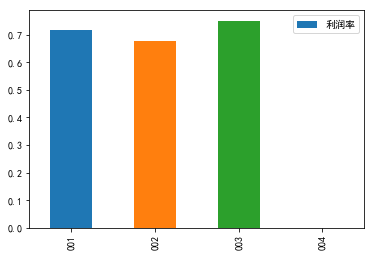

In [32]:
(df2.assign(利润率 = lambda df2:df2.创造收益/df2.销售业绩)
    .plot(kind = 'bar',y = "利润率"))
plt.rcParams['font.sans-serif']=['Simhei'];  #显示中文

In [33]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别
001,赵一,30000.0,6000.0,2500,125.0,21500.0,True,脑洞大开有限公司,女
002,钱明,20000.0,4000.0,2500,125.0,13500.0,False,脑洞大开有限公司,NaN
003,周元,50000.0,10000.0,2500,125.0,37500.0,True,脑洞大开有限公司,男
004,李雷,NaN,NaN,2500,125.0,NaN,False,脑洞大开有限公司,NaN


实际工作中,导入数据后的第一件事实copy一份数据,避免在原始数据集上做改动,一旦操作出错,原数据集可以找回

### 索引/选择

索引/选择的基本语法如下：

| 实现目的 | 语法 | 结果 |    
|----------|------|------|  
| 选择列  | df[col] |Series| 
| 切片行 | df[5:10] |DataFrame |  
| 按标签选择行| df.loc[label]| Series |  
| 按位置选择行| df.iloc[loc] | Series |   
| 按布尔向量选择行 | df[bool_vec] | DataFrame|    

#### 直接选择列

In [34]:
df2["员工姓名"]  #选取一列,返回的数据结构为series

001    赵一
002    钱明
003    周元
004    李雷
Name: 员工姓名, dtype: object

In [35]:
df2.员工姓名  #只能选取一列

001    赵一
002    钱明
003    周元
004    李雷
Name: 员工姓名, dtype: object

In [36]:
df2[["员工姓名","提成收入"]] #选取两列及以上,返回结果为dataframe,注意选择两列级以上需要用方括号把选取的列名都括起来

,员工姓名,提成收入
001,赵一,6000.0
002,钱明,4000.0
003,周元,10000.0
004,李雷,NaN


#### 直接选择行

In [37]:
df2["002":"004"]  

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别
002,钱明,20000.0,4000.0,2500,125.0,13500.0,False,脑洞大开有限公司,NaN
003,周元,50000.0,10000.0,2500,125.0,37500.0,True,脑洞大开有限公司,男
004,李雷,NaN,NaN,2500,125.0,NaN,False,脑洞大开有限公司,NaN


In [38]:
df2["002":"002"]  #选择一行

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别
002,钱明,20000.0,4000.0,2500,125.0,13500.0,False,脑洞大开有限公司,NaN


In [39]:
df2[1:][["员工姓名","提成收入"]]  

,员工姓名,提成收入
002,钱明,4000.0
003,周元,10000.0
004,李雷,NaN


In [40]:
df2[1:3] #用位置切片的时候,不包含终止值

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别
002,钱明,20000.0,4000.0,2500,125.0,13500.0,False,脑洞大开有限公司,NaN
003,周元,50000.0,10000.0,2500,125.0,37500.0,True,脑洞大开有限公司,男


In [41]:
df2[1:2]  #切取第002条记录

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别
002,钱明,20000.0,4000.0,2500,125.0,13500.0,False,脑洞大开有限公司,NaN


#### 基于标签的索引
.loc 是基于标签的索引，必须使用数据的标签属性，否则会返回一个异常。

基于标签索引的基本语法 : df.loc[行索引,列索引] 

逗号之前是切取的行信息,逗号之后是切取的列信息

只切取行信息返回所有列信息的时候,列索引和逗号可以省略

只切取列信息返回所有行信息的时候,行索引和冒号不能省略,用冒号表示切取所有行.

In [42]:
df2.loc["001"]  #指窃取一行或者一列数据是返回series数据结构

员工姓名          赵一
销售业绩       30000
提成收入        6000
基本工资        2500
社保金额         125
创造收益       21500
是否达标        True
公司名称    脑洞大开有限公司
性别             女
Name: 001, dtype: object

In [43]:
df2.loc[:,"员工姓名"] 

001    赵一
002    钱明
003    周元
004    李雷
Name: 员工姓名, dtype: object

In [44]:
df2.loc["001":"003"]  

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别
001,赵一,30000.0,6000.0,2500,125.0,21500.0,True,脑洞大开有限公司,女
002,钱明,20000.0,4000.0,2500,125.0,13500.0,False,脑洞大开有限公司,NaN
003,周元,50000.0,10000.0,2500,125.0,37500.0,True,脑洞大开有限公司,男


In [45]:
df2.loc[:,"员工姓名":"创造收益"]  #切取列信息,返回所有行信息的时候注意冒号表示所有行并加逗号隔开行索引和列索引

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益
001,赵一,30000.0,6000.0,2500,125.0,21500.0
002,钱明,20000.0,4000.0,2500,125.0,13500.0
003,周元,50000.0,10000.0,2500,125.0,37500.0
004,李雷,NaN,NaN,2500,125.0,NaN


In [46]:
df2.loc["001":"003","员工姓名":"创造收益"]  #切取完整数据框中的一部分

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益
001,赵一,30000.0,6000.0,2500,125.0,21500.0
002,钱明,20000.0,4000.0,2500,125.0,13500.0
003,周元,50000.0,10000.0,2500,125.0,37500.0


In [47]:
df2.loc[["001","003"]]  #切取不连续的记录

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别
001,赵一,30000.0,6000.0,2500,125.0,21500.0,True,脑洞大开有限公司,女
003,周元,50000.0,10000.0,2500,125.0,37500.0,True,脑洞大开有限公司,男


In [48]:
df2.loc[:,["员工姓名","提成收入"]]  #切取不连续的列信息

,员工姓名,提成收入
001,赵一,6000.0
002,钱明,4000.0
003,周元,10000.0
004,李雷,NaN


In [49]:
df2.loc[["001","003"],["员工姓名","创造收益","提成收入"]]  #切取的行列信息都可以不连续,注意各个标签需要用方括号括起来,标签的顺序自定义

,员工姓名,创造收益,提成收入
001,赵一,21500.0,6000.0
003,周元,37500.0,10000.0


In [367]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女,离职,初级
002,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,离职,初级
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,在职,高级
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,离职,高级
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,在职,中级


In [368]:
df2.销售业绩.replace(20000,0)

索引
001    30000
002        0
003    50000
004    40000
005    60000
006    60000
007    50000
Name: 销售业绩, dtype: int64

指向具体一列的某个记录值 df.at[行索引,列索引]

In [51]:
df2.at["001","员工姓名"]

'赵一'

In [52]:
df2.loc["001","员工姓名"]  #用.loc也可以实现

'赵一'

In [53]:
df2.at["004","销售业绩"] = 40000 #可以对单个信息进行更改

In [54]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别
001,赵一,30000.0,6000.0,2500,125.0,21500.0,True,脑洞大开有限公司,女
002,钱明,20000.0,4000.0,2500,125.0,13500.0,False,脑洞大开有限公司,NaN
003,周元,50000.0,10000.0,2500,125.0,37500.0,True,脑洞大开有限公司,男
004,李雷,40000.0,NaN,2500,125.0,NaN,False,脑洞大开有限公司,NaN


.loc 同时也可以用来扩展数据的列：

In [55]:
df2.loc[:,"员工状态"] = "在职"

In [56]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态
001,赵一,30000.0,6000.0,2500,125.0,21500.0,True,脑洞大开有限公司,女,在职
002,钱明,20000.0,4000.0,2500,125.0,13500.0,False,脑洞大开有限公司,NaN,在职
003,周元,50000.0,10000.0,2500,125.0,37500.0,True,脑洞大开有限公司,男,在职
004,李雷,40000.0,NaN,2500,125.0,NaN,False,脑洞大开有限公司,NaN,在职


In [57]:
df2.loc[:,"整数"] = df2.loc[:,"销售业绩"].apply(round)  #pd.apply允许用户传递一个函数并将其应用于Pandas系列的每个值

In [58]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,整数
001,赵一,30000.0,6000.0,2500,125.0,21500.0,True,脑洞大开有限公司,女,在职,30000
002,钱明,20000.0,4000.0,2500,125.0,13500.0,False,脑洞大开有限公司,NaN,在职,20000
003,周元,50000.0,10000.0,2500,125.0,37500.0,True,脑洞大开有限公司,男,在职,50000
004,李雷,40000.0,NaN,2500,125.0,NaN,False,脑洞大开有限公司,NaN,在职,40000


In [59]:
df2.drop("整数",axis=1,inplace=True)

In [60]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态
001,赵一,30000.0,6000.0,2500,125.0,21500.0,True,脑洞大开有限公司,女,在职
002,钱明,20000.0,4000.0,2500,125.0,13500.0,False,脑洞大开有限公司,NaN,在职
003,周元,50000.0,10000.0,2500,125.0,37500.0,True,脑洞大开有限公司,男,在职
004,李雷,40000.0,NaN,2500,125.0,NaN,False,脑洞大开有限公司,NaN,在职


.loc 同时也可以用来扩展数据的行：

In [61]:
df2.loc["005"] = 233  #可以赋值一个标量

In [62]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职
005,233,233.0,233.0,233,233.0,233.0,233,233,233,233


In [63]:
df2.drop("005",axis=0,inplace=True)

In [64]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职


In [65]:
df2.loc["005"] = ["王七",60000,12000,2500,125,np.nan,0,"脑洞大开有限公司","男","在职"] #也可以用列表赋值进行不同列的赋值

In [66]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职


Series 也可以使用.loc 操作：

In [67]:
ser1 = df2.loc[:,"销售业绩"]
ser1

001    30000.0
002    20000.0
003    50000.0
004    40000.0
005    60000.0
Name: 销售业绩, dtype: float64

In [68]:
ser1.loc["003"]

50000.0

#### 基于位置的索引
.iloc 是基于位置的索引，传入的参数为目标区域的位置索引。

基于位置索引的基本语法 : df.iloc[行索引,列索引] 

逗号之前是切取的行信息,逗号之后是切取的列信息

只切取行信息返回所有列信息的时候,列索引和逗号可以省略

只切取列信息返回所有行信息的时候,行索引和冒号不能省略,用冒号表示切取所有行.

In [69]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职


In [70]:
df2.iloc[3] #通过位置索引的单独一行或者一列,返回的数据结构是series

员工姓名          李雷
销售业绩       40000
提成收入         NaN
基本工资        2500
社保金额         125
创造收益         NaN
是否达标           0
公司名称    脑洞大开有限公司
性别           NaN
员工状态          在职
Name: 004, dtype: object

In [71]:
df2.iloc[:,3]

001    2500
002    2500
003    2500
004    2500
005    2500
Name: 基本工资, dtype: int64

In [72]:
df2.iloc[1:4]  #基于位置的索引,切取的结果包含起始值的信息不包含终止值的信息  切取连续的行信息

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职


In [73]:
df2.iloc[:,1:4]   #切取连续的列信息

,销售业绩,提成收入,基本工资
001,30000.0,6000.0,2500
002,20000.0,4000.0,2500
003,50000.0,10000.0,2500
004,40000.0,NaN,2500
005,60000.0,12000.0,2500


In [74]:
df2.iloc[1:4,1:4]  #切取连续的一部分区域信息

,销售业绩,提成收入,基本工资
002,20000.0,4000.0,2500
003,50000.0,10000.0,2500
004,40000.0,NaN,2500


In [75]:
df2.iloc[[1,3,0]]  #切取不连续的行信息

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职


In [76]:
df2.iloc[:,[1,3,6,4]] #切取不连续的列信息

,销售业绩,基本工资,是否达标,社保金额
001,30000.0,2500,1,125.0
002,20000.0,2500,0,125.0
003,50000.0,2500,1,125.0
004,40000.0,2500,0,125.0
005,60000.0,2500,0,125.0


In [77]:
df2.iloc[[1,3,0],[1,3,6,4]] #切取行和列都不连续的记录

,销售业绩,基本工资,是否达标,社保金额
002,20000.0,2500,0,125.0
004,40000.0,2500,0,125.0
001,30000.0,2500,1,125.0


In [78]:
df2.iat[1,0]  #定位单个标量  容易和at混淆,at是基于标签的定位,iat是基于位置的定位

'钱明'

In [79]:
df2.iloc[1,0]  #用iloc也可以实现

'钱明'

注意：单个值（标量）索引方式.at 和.iat 在效率和低开销上比.loc 和.iloc 都要优秀很多。

Series 也可以使用.iloc 操作：

In [80]:
ser2 = df2.iloc[:,1]

In [81]:
ser2

001    30000.0
002    20000.0
003    50000.0
004    40000.0
005    60000.0
Name: 销售业绩, dtype: float64

In [82]:
ser2.iloc[1]

20000.0

In [83]:
ser2.iloc[1:4]

002    20000.0
003    50000.0
004    40000.0
Name: 销售业绩, dtype: float64

#### 混合索引
用index,columns和loc进行的混合索引

In [84]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职


In [85]:
df2.index[[1,3]]

Index(['002', '004'], dtype='object')

In [86]:
df2.columns[0:3]

Index(['员工姓名', '销售业绩', '提成收入'], dtype='object')

In [87]:
df2.loc[df2.index[[1,3]],df2.columns[0:3]]  #理解index和columns方法返回的结果是什么类型,是标签还是位置

,员工姓名,销售业绩,提成收入
002,钱明,20000.0,4000.0
004,李雷,40000.0,NaN


用get_loc,get_indexer和iloc进行的混合索引

In [88]:
df2.columns.get_loc("员工姓名") #get_loc只能索引单个列,返回的是列索引的位置

0

In [89]:
df2.iloc[[1,3],df2.columns.get_loc("员工姓名")]  

002    钱明
004    李雷
Name: 员工姓名, dtype: object

In [90]:
df2.columns.get_indexer(["员工姓名","提成收入"])  #get_indexer可以索引多个列,返回列索引的位置

array([0, 2], dtype=int64)

In [91]:
df2.iloc[[1,3],df2.columns.get_indexer(["员工姓名","提成收入"])]  

,员工姓名,提成收入
002,钱明,4000.0
004,李雷,NaN


#### 布尔型索引
使用布尔向量来过滤选取数据。     |

|符号|含义|释义|
|----|----|----|
| \||or|或者|
|&|and|并且|
|~|not|取反|
|^|xor|异或|

其中表示 not 的也有使用 - 的，但是建议使用 ~ ，这些运算如果进行组合则必须使用括号分组。

In [92]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职


In [93]:
60000 - 2500 - 125-12000

45375

##### ser2  #单独切出销售业绩这一列

In [94]:
ser2[ser2>40000]  #查看销售业绩好的记录

003    50000.0
005    60000.0
Name: 销售业绩, dtype: float64

In [95]:
ser2[(ser2>40000)|(ser2<30000)]  #查看销售业绩好和销售业绩不好的记录 用"或者"  运算进行组合必须使用括号分组

002    20000.0
003    50000.0
005    60000.0
Name: 销售业绩, dtype: float64

In [96]:
(ser2>40000)|(ser2<30000)

001    False
002     True
003     True
004    False
005     True
Name: 销售业绩, dtype: bool

series和dataframe都可以用位运算符

In [97]:
df2.loc["006"] = ["赵三",60000,12000,2500,125,45375,0,"脑洞大开有限公司","男",np.nan] 
df2.loc["007"] = ["赵六",50000,10000,2500,125,37500,1,np.nan,"女","在职"] 

In [98]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职


In [99]:
df2[(df2.销售业绩>40000)&(df2.创造收益>20000)]  #查看销售业绩大于40000并且创造收益大于20000的记录  &

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职


In [100]:
df2['员工等级'] = pd.Series(["初级","初级","中级","中级","高级","高级","中级"],index = ['001','002','003','004','005','006','007'])

In [101]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [102]:
# startswith() 方法用于检查字符串是否是以指定子字符串开头，如果是则返回 True，否则返回 False。
# 如果参数 beg 和 end 指定值，则在指定范围内检查。

In [103]:
con = df2['员工等级'].map(lambda x: x.startswith('中'))  #获取姓氏是赵的员工记录,map函数实现一一映射df2["员工等级"]中的每一个元素
df2[con]

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [104]:
df2[[x.startswith('中') for x in df2['员工等级']]]  #用列表推导式也可以实现

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [105]:
df2[con & (df2['是否达标'] == 1)]  #员工等级为中级并且销售达标的记录

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [106]:
df2.loc[con & (df2['是否达标'] == 1),'员工姓名':'创造收益']  #只查看符合条件的一部分信息

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益
003,周元,50000.0,10000.0,2500,125.0,37500.0
007,赵六,50000.0,10000.0,2500,125.0,37500.0


和 isin 组合使用(series和dataframe都支持isin)：

In [107]:
ser3 = df2.是否达标

In [108]:
ser3

001    1
002    0
003    1
004    0
005    0
006    0
007    1
Name: 是否达标, dtype: int64

In [109]:
ser3.isin([1])  #看一下都有谁达标了

001     True
002    False
003     True
004    False
005    False
006    False
007     True
Name: 是否达标, dtype: bool

In [110]:
ser3[ser3.isin([1]) ]

001    1
003    1
007    1
Name: 是否达标, dtype: int64

In [111]:
df2[df2.是否达标.isin([1])]  #用isin查看销售达标的记录

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [112]:
df2[df2.是否达标 == 1]  #只有一个条件的时候直接查看也是可以的

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [113]:
df2[df2["员工等级"].isin(["中级","高级"])]  #用isin筛选查看符合多条件的记录,员工等级是高级和中级的记录

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [114]:
con1 ={"员工等级":["中级","高级"],"销售业绩":[50000,60000]}  #多列多条件查询
con1

{'员工等级': ['中级', '高级'], '销售业绩': [50000, 60000]}

In [115]:
df2.isin(con1)

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,False,False,False,False,False,False,False,False,False,False,False
002,False,False,False,False,False,False,False,False,False,False,False
003,False,True,False,False,False,False,False,False,False,False,True
004,False,False,False,False,False,False,False,False,False,False,True
005,False,True,False,False,False,False,False,False,False,False,True
006,False,True,False,False,False,False,False,False,False,False,True
007,False,True,False,False,False,False,False,False,False,False,True


将 DataFrame 的 isin 与 any 和 all 方法结合，可以快速选择符合给定条件的数据子集。

如：只选择每列都符合自己的标准的那些行：

In [117]:
df3 = df2.loc[:,['员工姓名','员工等级','销售业绩']]
df3

,员工姓名,员工等级,销售业绩
001,赵一,初级,30000.0
002,钱明,初级,20000.0
003,周元,中级,50000.0
004,李雷,中级,40000.0
005,王七,高级,60000.0
006,赵三,高级,60000.0
007,赵六,中级,50000.0


In [118]:
con2 = {"员工姓名":["赵一","钱明","周元","李雷","王七","赵三","赵六"],"员工等级":["中级","高级"],"销售业绩":[50000,60000]}
con3 = df3.isin(con2).all(1)   #查找每一行的每个元素都符合要求的记录,所以每列的元素都必须是完整的,否则会影响判断
df3[con3]                     #all(1)里边的参数1表示轴信息

,员工姓名,员工等级,销售业绩
003,周元,中级,50000.0
005,王七,高级,60000.0
006,赵三,高级,60000.0
007,赵六,中级,50000.0


In [340]:
con4 = {"员工姓名":["赵一","钱明","周元","李雷"],"员工等级":["中级","高级"],"销售业绩":[50000,60000]}
con5 = df3.isin(con4).any(1)   #查找每一行的任意元素符合要求的记录,所以每列的元素都必须是完整的,都在会影响判断
df3[con5]

,员工姓名,员工等级,销售业绩
索引,,,
001,赵一,初级,30000.0
002,钱明,初级,20000.0
003,周元,中级,50000.0
004,李雷,中级,40000.0
005,王七,高级,60000.0
006,赵三,高级,60000.0
007,赵六,中级,50000.0


In [120]:
con1

{'员工等级': ['中级', '高级'], '销售业绩': [50000, 60000]}

In [121]:
df2[df2.isin(con1).any(1)]

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [122]:
df2[df2.isin(con1).all(1)]  #思考为什么没有符合条件的记录?
# 因为其他列没有设定条件,所以全部默认为false,all()方法的性质只要判断条件中有一个喂false则返回false,所以没有符合条件的记录

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级


In [342]:
df2[df2.isin(con1).any(1)]

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,在职,高级
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,离职,高级
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,在职,中级


isin同样也可以应用在 index 对象上面：

In [123]:
df2[df2.index.isin(["002","003","007"])]

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [124]:
df2.loc[["002","003","007"]]  #用基于位置或者基于标签的索引也可以实现

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [125]:
df2.iloc[[1,2,6]]

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


通常我们返回的结果是原数据集的一个子集，使用 where 方法可以保证选择输出与原始数据 的形状相同：

In [126]:
ser2

001    30000.0
002    20000.0
003    50000.0
004    40000.0
005    60000.0
Name: 销售业绩, dtype: float64

In [127]:
ser2 > 40000

001    False
002    False
003     True
004    False
005     True
Name: 销售业绩, dtype: bool

In [128]:
ser2[ser2 > 40000]  #不符合条件的记录不显示

003    50000.0
005    60000.0
Name: 销售业绩, dtype: float64

In [129]:
ser2.where(ser2 > 40000)   #不符合条件的记录会被用空值填充,但是保留了完整的原来的数据格式

001        NaN
002        NaN
003    50000.0
004        NaN
005    60000.0
Name: 销售业绩, dtype: float64

In [130]:
ser2.where(ser2 > 40000,other = 0)  #不符合条件的记录可以用指定字符替换

001        0.0
002        0.0
003    50000.0
004        0.0
005    60000.0
Name: 销售业绩, dtype: float64

In [131]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [132]:
df2.where(df2.是否达标 ==1)  #只返回符合条件的记录,不符合条件的记录显示为空值

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,赵一,30000.0,6000.0,2500.0,125.0,21500.0,1.0,脑洞大开有限公司,女,在职,初级
002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
003,周元,50000.0,10000.0,2500.0,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007,赵六,50000.0,10000.0,2500.0,125.0,37500.0,1.0,NaN,女,在职,中级


In [133]:
df3

,员工姓名,员工等级,销售业绩
001,赵一,初级,30000.0
002,钱明,初级,20000.0
003,周元,中级,50000.0
004,李雷,中级,40000.0
005,王七,高级,60000.0
006,赵三,高级,60000.0
007,赵六,中级,50000.0


In [134]:
df3.where(df3.销售业绩 > 40000,other = 0)  #设置不符合条件记录的显示值

,员工姓名,员工等级,销售业绩
001,0,0,0.0
002,0,0,0.0
003,周元,中级,50000.0
004,0,0,0.0
005,王七,高级,60000.0
006,赵三,高级,60000.0
007,赵六,中级,50000.0


使用 query() 方法：

题目:查找销售业绩在40000以上并且是否达标为1的记录

In [135]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [136]:
#普通切片方法

In [137]:
(df2["销售业绩"] > 40000) & (df2["是否达标"] ==1)

001    False
002    False
003     True
004    False
005    False
006    False
007     True
dtype: bool

In [138]:
df2[(df2["销售业绩"] > 40000) & (df2["是否达标"] ==1)]

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [139]:
# 用query方法
df2.query('(销售业绩 > 40000) & (是否达标 == 1)')   
#注意书写要求,直接写列名,不需要用引号方括号,列名前也不需要挂dataframe名字前缀,query内的参数是字符串形式,记得加引号

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


小练习:通过query方法找出创造收益大于20000或者员工等级为中级的记录

In [140]:
df2.query("(创造收益>20000)|(员工等级 == '中级')")

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [141]:
# df2[(df2.创造收益>20000)|(df2.员工等级 == "中级")]  #普通方法

query方法也可以用在index上

In [345]:
np.random.seed(9)
df4 = pd.DataFrame({"a":range(1,6),"b":np.random.randn(5)})
df4

,a,b
0,1,0.001109
1,2,-0.289544
2,3,-1.116066
3,4,-0.012883
4,5,-0.378361


In [346]:
df4.query("(index < a & index < b )")  #如果index没有命名,直接用index

,a,b
0,1,0.001109


In [347]:
df4.index.name = "c"
df4

,a,b
c,,
0,1,0.001109
1,2,-0.289544
2,3,-1.116066
3,4,-0.012883
4,5,-0.378361


In [348]:
df4.query('c < a & c < b')  #如果index已经命名直接用index的名字

,a,b
c,,
0,1,0.001109


#### 随机抽样
使用 sample() 方法可以从 Series ，DataFrame 随机选择行或列。该方法将默认采样行，并接 受指定数量的行/列的返回。

In [146]:
ser6 = df2.员工姓名
ser6

001    赵一
002    钱明
003    周元
004    李雷
005    王七
006    赵三
007    赵六
Name: 员工姓名, dtype: object

In [147]:
ser6.sample()  #默认抽取一个元素

004    李雷
Name: 员工姓名, dtype: object

In [148]:
ser6.sample(2)  #随机抽取两名员工的名字

005    王七
004    李雷
Name: 员工姓名, dtype: object

也可以指定返回百分比，但是不能与 n 同时使用：

In [149]:
ser6.sample(frac=0.4)  #按照比例进行元素的抽取

003    周元
006    赵三
001    赵一
Name: 员工姓名, dtype: object

默认情况下，一行样本最多返回一次，即为无放回抽样。但也可以使用 replace 选项替换抽样方式：

In [150]:
ser6.sample(3, replace=False)  #replace=False为无放回抽样,一次抽样中同一个元素不会被抽到两次及以上

001    赵一
006    赵三
004    李雷
Name: 员工姓名, dtype: object

In [151]:
ser6.sample(3, replace=True)  #replace=True为有放回抽样,一次抽样中同一个元素有可能被抽到两次及以上

004    李雷
006    赵三
006    赵三
Name: 员工姓名, dtype: object

In [152]:
ser6.sample(8, replace=False) #无放回抽样的情况下,设定的样本数量不能超过总体的数量

ValueError: Cannot take a larger sample than population when 'replace=False'

In [153]:
ser6.sample(8, replace=True)  #有放回抽样的情况下,设定的样本数量可以超过总体的数量

006    赵三
004    李雷
007    赵六
001    赵一
001    赵一
004    李雷
004    李雷
007    赵六
Name: 员工姓名, dtype: object

默认情况下，每一行被选择的概率相等。但是如果希望各行具有不同的概率，则可以提供权重 作为 sample 方法的抽样权重。

权重可以是列表，数字数组或 Series，但长度必须与要采样的对象 长度相同。

注意：如果权重之和不为 1，那么函数会将所有权重除以权重之和来重新归一化。

In [154]:
weight = [1,2,3,4,5,6,7]
ser6.sample(3,weights = weight )

006    赵三
002    钱明
007    赵六
Name: 员工姓名, dtype: object

In [155]:
df2.sample(2,weights = weight)

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级


应用于 DataFrame 时，可以使用 DataFrame 的列的值作为采样权重（采样行而不是列的情况 下），只需将列的名称作为字符串传递进去即可。

In [156]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [157]:
df2.sample(3,weights = "销售业绩")  #以销售业绩列作为权重,说明销售业绩约好的人越有更大的概率被抽中

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级


上述抽样都是针对行信息进行抽样,通过 sample 的 axis 参数可以对列进行采样：

In [349]:
df2.sample(n=2, axis=1)

,公司名称,提成收入
索引,,
001,脑洞有限公司,6000.0
002,脑洞有限公司,4000.0
003,脑洞有限公司,10000.0
004,脑洞有限公司,8000.0
005,脑洞有限公司,12000.0
006,脑洞有限公司,12000.0
007,脑洞有限公司,10000.0


如果需要重现随机结果，可以通过 random_state 参数设置随机数种子：

In [159]:
df2.sample(n=2, random_state=3)  
#random_state=3 这个参数后边的数字是几都可以,只是限制抽样规则所得出的结果,相同的抽样规则每次抽样结果都一样

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


### 数据对齐及运算

#### 普通对齐和运算

In [160]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [161]:
df5 = df2.copy()
df5

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [162]:
ser8=df5.员工姓名
df5

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [163]:
del df5["员工姓名"]

In [164]:
df5.index = ser8

In [165]:
df5

,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
员工姓名,,,,,,,,,,
赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [166]:
df6 = df5.iloc[:,:3]

In [167]:
df6

,销售业绩,提成收入,基本工资
员工姓名,,,
赵一,30000.0,6000.0,2500
钱明,20000.0,4000.0,2500
周元,50000.0,10000.0,2500
李雷,40000.0,NaN,2500
王七,60000.0,12000.0,2500
赵三,60000.0,12000.0,2500
赵六,50000.0,10000.0,2500


In [168]:
df7 = df5.iloc[:5,:2]
df7

,销售业绩,提成收入
员工姓名,,
赵一,30000.0,6000.0
钱明,20000.0,4000.0
周元,50000.0,10000.0
李雷,40000.0,NaN
王七,60000.0,12000.0


In [169]:
df7+df6

,基本工资,提成收入,销售业绩
员工姓名,,,
周元,NaN,20000.0,100000.0
李雷,NaN,NaN,80000.0
王七,NaN,24000.0,120000.0
赵一,NaN,12000.0,60000.0
赵三,NaN,NaN,NaN
赵六,NaN,NaN,NaN
钱明,NaN,8000.0,40000.0


在 DataFrame 和 Series 之间进行操作时，默认行为是使 DataFrame 列上的 Series 索引对齐，从而逐行广播：

In [170]:
df7 -  df7.iloc[0]

,销售业绩,提成收入
员工姓名,,
赵一,0.0,0.0
钱明,-10000.0,-2000.0
周元,20000.0,4000.0
李雷,10000.0,NaN
王七,30000.0,6000.0


#### 逻辑运算
逻辑运算与 NumPy 相似：

In [171]:
df7 = pd.DataFrame({'a' : [1, 0, 1], 'b' : [0, 1, 1] }, dtype=bool)
df8 = pd.DataFrame({'a' : [0, 1, 1], 'b' : [1, 1, 0] }, dtype=bool)

In [172]:
df7
df8

,a,b
0,True,False
1,False,True
2,True,True


,a,b
0,False,True
1,True,True
2,True,False


In [173]:
df7 & df8 # 且  对应的两个元素都为真才判断为真

,a,b
0,False,False
1,False,True
2,True,False


In [174]:
df7 | df8 # 或  对应的两个元素只要有一个位置就判断为真

,a,b
0,True,True
1,True,True
2,True,True


In [175]:
df7 ^ df8 # 异或  与(&)并且的判断完全相反

,a,b
0,True,True
1,True,False
2,False,True


In [176]:
~df7 # 取非  与原数据集判断完全相反

,a,b
0,False,True
1,True,False
2,False,False


In [177]:
df7

,a,b
0,True,False
1,False,True
2,True,True


### DataFrame & ufunc
由于 DataFrame 基于 NumPy 构建，可以直接使用大量 NumPy 中 ufunc 函数。

通用函数（或简称为ufunc）是一种以元素为单位对ndarray进行操作的函数，支持数组广播，类型转换和其他一些标准特性。 也就是说，ufunc是一个函数的“矢量化”包装器，它接受固定数量的特定输入并产生固定数量的特定输出。

In [178]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [179]:
df9 = df2.iloc[:3,2:5]
df9

,提成收入,基本工资,社保金额
001,6000.0,2500,125.0
002,4000.0,2500,125.0
003,10000.0,2500,125.0


In [180]:
np.add(df9,100)  #执行加法,涉及到的所有金额加100

,提成收入,基本工资,社保金额
001,6100.0,2600.0,225.0
002,4100.0,2600.0,225.0
003,10100.0,2600.0,225.0


In [181]:
np.divide(df9,1000) #执行除法,变换单位为千

,提成收入,基本工资,社保金额
001,6.0,2.5,0.125
002,4.0,2.5,0.125
003,10.0,2.5,0.125


In [182]:
np.asarray(df9)  #把dataframe转换成数组

array([[ 6000.,  2500.,   125.],
       [ 4000.,  2500.,   125.],
       [10000.,  2500.,   125.]])

更多的 ufunc 功能请参考 Numpy 的相关知识。

##  数据查看 & 描述

In [183]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [184]:
df2.shape  #查看数据维度

(7, 11)

In [185]:
df2.index # 查看数据索引

Index(['001', '002', '003', '004', '005', '006', '007'], dtype='object')

In [186]:
df2.columns # 查看列名称

Index(['员工姓名', '销售业绩', '提成收入', '基本工资', '社保金额', '创造收益', '是否达标', '公司名称', '性别',
       '员工状态', '员工等级'],
      dtype='object')

In [187]:
df2.info() # 数据框详细信息

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 001 to 007
Data columns (total 11 columns):
员工姓名    7 non-null object
销售业绩    7 non-null float64
提成收入    6 non-null float64
基本工资    7 non-null int64
社保金额    7 non-null float64
创造收益    5 non-null float64
是否达标    7 non-null int64
公司名称    6 non-null object
性别      5 non-null object
员工状态    6 non-null object
员工等级    7 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 992.0+ bytes


In [188]:
df2.describe() # 简单描述分析

,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标
count,7.000000,6.000000,7.0,7.0,5.000000,7.000000
mean,44285.714286,9000.000000,2500.0,125.0,31075.000000,0.428571
std,15118.578920,3286.335345,0.0,0.0,13111.183204,0.534522
min,20000.000000,4000.000000,2500.0,125.0,13500.000000,0.000000
25%,35000.000000,7000.000000,2500.0,125.0,21500.000000,0.000000
50%,50000.000000,10000.000000,2500.0,125.0,37500.000000,0.000000
75%,55000.000000,11500.000000,2500.0,125.0,37500.000000,1.000000
max,60000.000000,12000.000000,2500.0,125.0,45375.000000,1.000000


In [189]:
df2.describe().T   #列信息特别多的时候可以转置查看

,count,mean,std,min,25%,50%,75%,max
销售业绩,7.0,44285.714286,15118.578920,20000.0,35000.0,50000.0,55000.0,60000.0
提成收入,6.0,9000.000000,3286.335345,4000.0,7000.0,10000.0,11500.0,12000.0
基本工资,7.0,2500.000000,0.000000,2500.0,2500.0,2500.0,2500.0,2500.0
社保金额,7.0,125.000000,0.000000,125.0,125.0,125.0,125.0,125.0
创造收益,5.0,31075.000000,13111.183204,13500.0,21500.0,37500.0,37500.0,45375.0
是否达标,7.0,0.428571,0.534522,0.0,0.0,0.0,1.0,1.0


In [190]:
df2.sort_index() # 对索引排序

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [191]:
df5.index = ["004","003","007","001","006","002","005"]

In [192]:
df5

,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
004,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
003,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
007,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
001,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
006,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
002,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
005,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [193]:
df5.sort_index()  #升序排列

,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
002,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
003,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
004,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
005,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级
006,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
007,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级


In [194]:
df5.sort_index(ascending=False)  #降序排列

,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
007,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
006,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
005,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级
004,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
003,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
002,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
001,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级


In [195]:
df2.sort_values(by='销售业绩') # 按值进行升序排序

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级


In [196]:
df2.sort_values(by='销售业绩',ascending = False) # 按值进行降序排序

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级


In [197]:
df2.index.name = '索引'

In [198]:
df2.sort_values(by=['销售业绩',"索引"]) # 按多个值进行升序排序

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级


In [199]:
df2.sort_values(by=['销售业绩',"索引"],ascending = False) # 按多个值进行降序序排序

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级


注意：排序默认的都是返回一个新的对象。如果需要修改原数据，那么需要传入参数 inplace=True。

## 缺失值处理

Pandas 中主要使用 np.nan 来表示缺失的数据。默认情况下不会被包括在计算中。

为了使检测到的缺失值更容易（并且跨不同列和数据类型），Pandas 提供了 isnull() 和 notnull() 函数，它们也是 Series 和 DataFrame 对象的方法。

In [216]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [217]:
df2["创造收益"].isnull()

索引
001    False
002    False
003    False
004     True
005     True
006    False
007    False
Name: 创造收益, dtype: bool

In [218]:
df2.isnull()

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,False,False,False,False,False,False,False,False,False,False,False
002,False,False,False,False,False,False,False,False,True,False,False
003,False,False,False,False,False,False,False,False,False,False,False
004,False,False,True,False,False,True,False,False,True,False,False
005,False,False,False,False,False,True,False,False,False,False,False
006,False,False,False,False,False,False,False,False,False,True,False
007,False,False,False,False,False,False,False,True,False,False,False


需要注意的是在 NumPy 中 np.nan 是不能用来做值相等的判断的，nan 不等于 (not equal) 任 何值，包括他自身，因此判断的结果一定是 False 。

因此，不能利用是否等于 np.nan 来判断是否为缺失值！

In [219]:
np.nan is np.nan

True

In [220]:
np.nan == np.nan

False

###  缺失值查看
一般通过下面的方式查看数据的缺失情况：

df.isnull()

In [221]:
df2.isnull()

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,False,False,False,False,False,False,False,False,False,False,False
002,False,False,False,False,False,False,False,False,True,False,False
003,False,False,False,False,False,False,False,False,False,False,False
004,False,False,True,False,False,True,False,False,True,False,False
005,False,False,False,False,False,True,False,False,False,False,False
006,False,False,False,False,False,False,False,False,False,True,False
007,False,False,False,False,False,False,False,True,False,False,False


In [222]:
df2.isnull().sum()  #查看每一列的缺失值数量

员工姓名    0
销售业绩    0
提成收入    1
基本工资    0
社保金额    0
创造收益    2
是否达标    0
公司名称    1
性别      2
员工状态    1
员工等级    0
dtype: int64

In [223]:
df2.isnull().sum()/len(df2)   #计算每一列的缺失值比例

员工姓名    0.000000
销售业绩    0.000000
提成收入    0.142857
基本工资    0.000000
社保金额    0.000000
创造收益    0.285714
是否达标    0.000000
公司名称    0.142857
性别      0.285714
员工状态    0.142857
员工等级    0.000000
dtype: float64

In [224]:
df2.isnull().sum()/df2.shape[0]  #计算缺失值比例的另一种方法

员工姓名    0.000000
销售业绩    0.000000
提成收入    0.142857
基本工资    0.000000
社保金额    0.000000
创造收益    0.285714
是否达标    0.000000
公司名称    0.142857
性别      0.285714
员工状态    0.142857
员工等级    0.000000
dtype: float64

In [225]:
df2.isnull().mean()*100   #取巧的方法直接用.mean()  

员工姓名     0.000000
销售业绩     0.000000
提成收入    14.285714
基本工资     0.000000
社保金额     0.000000
创造收益    28.571429
是否达标     0.000000
公司名称    14.285714
性别      28.571429
员工状态    14.285714
员工等级     0.000000
dtype: float64

In [226]:
df2.性别.isnull() #isnull()也支持series

索引
001    False
002     True
003    False
004     True
005    False
006    False
007    False
Name: 性别, dtype: bool

In [227]:
df2.性别.value_counts()  #查看某一列的数据分成了哪几类,每一类有多少个

男    3
女    2
Name: 性别, dtype: int64

In [228]:
df2.销售业绩.value_counts()

60000.0    2
50000.0    2
40000.0    1
20000.0    1
30000.0    1
Name: 销售业绩, dtype: int64

In [229]:
df2.性别.replace(np.nan,"女")  #不改变原数据集的元素,需要再原数据集做更改的话设置inplace参数等于True

索引
001    女
002    女
003    男
004    女
005    男
006    男
007    女
Name: 性别, dtype: object

In [230]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


pd.isnull()

In [231]:
pd.isnull(df2)  #返回和原数据框形状相同的布尔型数据框

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,False,False,False,False,False,False,False,False,False,False,False
002,False,False,False,False,False,False,False,False,True,False,False
003,False,False,False,False,False,False,False,False,False,False,False
004,False,False,True,False,False,True,False,False,True,False,False
005,False,False,False,False,False,True,False,False,False,False,False
006,False,False,False,False,False,False,False,False,False,True,False
007,False,False,False,False,False,False,False,True,False,False,False


In [232]:
pd.notnull(df2)  #和pd.isnull()返回完全相反的结果

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,True,True,True,True,True,True,True,True,True,True,True
002,True,True,True,True,True,True,True,True,False,True,True
003,True,True,True,True,True,True,True,True,True,True,True
004,True,True,False,True,True,False,True,True,False,True,True
005,True,True,True,True,True,False,True,True,True,True,True
006,True,True,True,True,True,True,True,True,True,False,True
007,True,True,True,True,True,True,True,False,True,True,True


注意pd.isnull()和df.isnull()用法的区别,pd.isnull()应用范围是所有的pandas对象,包括dataframe和series,需要传入被判断的数据作为参数,需要确定是对谁进行判断;而df.isnull()是不需要传入参数的,它判断的是df本身,也可以是ser

In [233]:
df2.replace({"性别":{np.nan:"女"},"创造收益":{np.nan:20000}})  #利用字典可以同时更改多个列的指定元素

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,女,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,20000.0,0,脑洞大开有限公司,女,在职,中级
005,王七,60000.0,12000.0,2500,125.0,20000.0,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [234]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [235]:
df2.iloc[[0,1,3,5],[1,2,4,6,9]] = np.nan   #人为制造一些缺失值

In [236]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,NaN,NaN,2500,NaN,21500.0,NaN,脑洞大开有限公司,女,NaN,初级
002,钱明,NaN,NaN,2500,NaN,13500.0,NaN,脑洞大开有限公司,NaN,NaN,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
004,李雷,NaN,NaN,2500,NaN,NaN,NaN,脑洞大开有限公司,NaN,NaN,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0.0,脑洞大开有限公司,男,在职,高级
006,赵三,NaN,NaN,2500,NaN,45375.0,NaN,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1.0,NaN,女,在职,中级


### 缺失值运算规则
- 当进行求和运算时，缺失的数据将会被当作零来计算。
- 如果数据全部为 NA ，那么结果也会返回 NA 。
- 像 cumsum() 和 cumprod() 等方法会忽略 NA 值，但是会在返回的结果数组中回显示缺失的值。

In [237]:
df14 = pd.DataFrame([[2.0, 1.0,3.0],
                    [3.0, np.nan,1.0],
                    [1.0, 0.0,2.0]],
                  columns=list('ABC'))
df14

,A,B,C
0,2.0,1.0,3.0
1,3.0,NaN,1.0
2,1.0,0.0,2.0


In [350]:
df14.cumsum()  #返回指定轴上的累积和,对每一列求累计和

,A,B,C
0,2.0,1.0,3.0
1,5.0,NaN,4.0
2,6.0,1.0,6.0


In [239]:
df14.cumsum(1) #对每一行求累计和

,A,B,C
0,2.0,3.0,6.0
1,3.0,NaN,4.0
2,1.0,1.0,3.0


In [240]:
df14

,A,B,C
0,2.0,1.0,3.0
1,3.0,NaN,1.0
2,1.0,0.0,2.0


In [241]:
df14.cumprod() #返回指定轴上的累计积 对每一列求累积积 axis=0/index

,A,B,C
0,2.0,1.0,3.0
1,6.0,NaN,3.0
2,6.0,0.0,6.0


In [242]:
df14.cumprod(1) #axis=1/columns 对每一列求累积积

,A,B,C
0,2.0,2.0,6.0
1,3.0,NaN,3.0
2,1.0,0.0,0.0


###  清理/填补缺失值
- Pandas 对象具有多种数据处理方法来处理缺失的数据。
- fillna() 方法可以通过几种方式将非空数据填补到 NA 值的位置。
- replace() 方法把缺失值替换成指定字符

In [243]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,NaN,NaN,2500,NaN,21500.0,NaN,脑洞大开有限公司,女,NaN,初级
002,钱明,NaN,NaN,2500,NaN,13500.0,NaN,脑洞大开有限公司,NaN,NaN,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
004,李雷,NaN,NaN,2500,NaN,NaN,NaN,脑洞大开有限公司,NaN,NaN,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0.0,脑洞大开有限公司,男,在职,高级
006,赵三,NaN,NaN,2500,NaN,45375.0,NaN,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1.0,NaN,女,在职,中级


fillna()方法

In [244]:
df2.fillna(0)  #对整个数据框的缺失值用同一个指定字符填充,实际工作中不常用

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,0.0,0.0,2500,0.0,21500.0,0.0,脑洞大开有限公司,女,0,初级
002,钱明,0.0,0.0,2500,0.0,13500.0,0.0,脑洞大开有限公司,0,0,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
004,李雷,0.0,0.0,2500,0.0,0.0,0.0,脑洞大开有限公司,0,0,中级
005,王七,60000.0,12000.0,2500,125.0,0.0,0.0,脑洞大开有限公司,男,在职,高级
006,赵三,0.0,0.0,2500,0.0,45375.0,0.0,脑洞大开有限公司,男,0,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1.0,0,女,在职,中级


In [245]:
df2.员工状态.fillna("在职")  #每个列的数据类型可能不一样,可以对某一列的缺失值用指定的同一字符进行填充

索引
001    在职
002    在职
003    在职
004    在职
005    在职
006    在职
007    在职
Name: 员工状态, dtype: object

特殊情况下，可能会需要用缺失值附近的值进行填补。

In [246]:
df2.fillna(method='bfill')  #用后一条记录中的值对缺失值进行填充

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,50000.0,10000.0,2500,125.0,21500.0,1.0,脑洞大开有限公司,女,在职,初级
002,钱明,50000.0,10000.0,2500,125.0,13500.0,1.0,脑洞大开有限公司,男,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
004,李雷,60000.0,12000.0,2500,125.0,45375.0,0.0,脑洞大开有限公司,男,在职,中级
005,王七,60000.0,12000.0,2500,125.0,45375.0,0.0,脑洞大开有限公司,男,在职,高级
006,赵三,50000.0,10000.0,2500,125.0,45375.0,1.0,脑洞大开有限公司,男,在职,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1.0,NaN,女,在职,中级


In [247]:
df2.fillna(method='bfill', limit=1)  #limit限制值填充最近的一行

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,NaN,NaN,2500,NaN,21500.0,NaN,脑洞大开有限公司,女,NaN,初级
002,钱明,50000.0,10000.0,2500,125.0,13500.0,1.0,脑洞大开有限公司,男,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
004,李雷,60000.0,12000.0,2500,125.0,NaN,0.0,脑洞大开有限公司,男,在职,中级
005,王七,60000.0,12000.0,2500,125.0,45375.0,0.0,脑洞大开有限公司,男,在职,高级
006,赵三,50000.0,10000.0,2500,125.0,45375.0,1.0,脑洞大开有限公司,男,在职,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1.0,NaN,女,在职,中级


In [248]:
df2.fillna(method='ffill', limit=1)  #用前一条记录的值对缺失值进行填充limit. 

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,NaN,NaN,2500,NaN,21500.0,NaN,脑洞大开有限公司,女,NaN,初级
002,钱明,NaN,NaN,2500,NaN,13500.0,NaN,脑洞大开有限公司,女,NaN,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
004,李雷,50000.0,10000.0,2500,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0.0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0.0,脑洞大开有限公司,男,在职,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1.0,脑洞大开有限公司,女,在职,中级


其中填补的方式：

- pad / ffill:Fill values forward
- bfill / backfil: Fill values backward
- axis参数限制填充的轴 inplace参数控制是否在原数据集上做更改

replace()方法

In [249]:
df2.销售业绩.replace(np.nan,1)

索引
001        1.0
002        1.0
003    50000.0
004        1.0
005    60000.0
006        1.0
007    50000.0
Name: 销售业绩, dtype: float64

In [250]:
df2.销售业绩.replace(50000,np.nan)  #也可以把指定字符替换成空值

索引
001        NaN
002        NaN
003        NaN
004        NaN
005    60000.0
006        NaN
007        NaN
Name: 销售业绩, dtype: float64

In [251]:
df2.replace(method = "ffill")  #用前一条记录对缺失值进行填充,也可以设置limit参数对填充的数量进行限制

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,NaN,NaN,2500,NaN,21500.0,NaN,脑洞大开有限公司,女,NaN,初级
002,钱明,NaN,NaN,2500,NaN,13500.0,NaN,脑洞大开有限公司,女,NaN,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
004,李雷,50000.0,10000.0,2500,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
005,王七,60000.0,12000.0,2500,125.0,37500.0,0.0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0.0,脑洞大开有限公司,男,在职,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1.0,脑洞大开有限公司,女,在职,中级


数值型数据可以用均值或者中位数进行填充

In [252]:
df2.销售业绩.fillna(df2.销售业绩.mean()) #用均值进行填充

索引
001    53333.333333
002    53333.333333
003    50000.000000
004    53333.333333
005    60000.000000
006    53333.333333
007    50000.000000
Name: 销售业绩, dtype: float64

In [253]:
df2.销售业绩.fillna(df2.销售业绩.median())  #用中位数填充

索引
001    50000.0
002    50000.0
003    50000.0
004    50000.0
005    60000.0
006    50000.0
007    50000.0
Name: 销售业绩, dtype: float64

In [254]:
df2.fillna(df2.mean())

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,53333.333333,10666.666667,2500,125.0,21500.0,0.666667,脑洞大开有限公司,女,NaN,初级
002,钱明,53333.333333,10666.666667,2500,125.0,13500.0,0.666667,脑洞大开有限公司,NaN,NaN,初级
003,周元,50000.000000,10000.000000,2500,125.0,37500.0,1.000000,脑洞大开有限公司,男,在职,中级
004,李雷,53333.333333,10666.666667,2500,125.0,31075.0,0.666667,脑洞大开有限公司,NaN,NaN,中级
005,王七,60000.000000,12000.000000,2500,125.0,31075.0,0.000000,脑洞大开有限公司,男,在职,高级
006,赵三,53333.333333,10666.666667,2500,125.0,45375.0,0.666667,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.000000,10000.000000,2500,125.0,37500.0,1.000000,NaN,女,在职,中级


In [255]:
df2.fillna(df2.median())

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,50000.0,10000.0,2500,125.0,21500.0,1.0,脑洞大开有限公司,女,NaN,初级
002,钱明,50000.0,10000.0,2500,125.0,13500.0,1.0,脑洞大开有限公司,NaN,NaN,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
004,李雷,50000.0,10000.0,2500,125.0,37500.0,1.0,脑洞大开有限公司,NaN,NaN,中级
005,王七,60000.0,12000.0,2500,125.0,37500.0,0.0,脑洞大开有限公司,男,在职,高级
006,赵三,50000.0,10000.0,2500,125.0,45375.0,1.0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1.0,NaN,女,在职,中级


In [256]:
df2.fillna(df2.mean()["销售业绩":"提成收入"])  #只填充指定列

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,53333.333333,10666.666667,2500,NaN,21500.0,NaN,脑洞大开有限公司,女,NaN,初级
002,钱明,53333.333333,10666.666667,2500,NaN,13500.0,NaN,脑洞大开有限公司,NaN,NaN,初级
003,周元,50000.000000,10000.000000,2500,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
004,李雷,53333.333333,10666.666667,2500,NaN,NaN,NaN,脑洞大开有限公司,NaN,NaN,中级
005,王七,60000.000000,12000.000000,2500,125.0,NaN,0.0,脑洞大开有限公司,男,在职,高级
006,赵三,53333.333333,10666.666667,2500,NaN,45375.0,NaN,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.000000,10000.000000,2500,125.0,37500.0,1.0,NaN,女,在职,中级


In [257]:
df2.fillna(df2.mean()[["销售业绩","提成收入","社保金额"]])  #只填充指定列

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,53333.333333,10666.666667,2500,125.0,21500.0,NaN,脑洞大开有限公司,女,NaN,初级
002,钱明,53333.333333,10666.666667,2500,125.0,13500.0,NaN,脑洞大开有限公司,NaN,NaN,初级
003,周元,50000.000000,10000.000000,2500,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
004,李雷,53333.333333,10666.666667,2500,125.0,NaN,NaN,脑洞大开有限公司,NaN,NaN,中级
005,王七,60000.000000,12000.000000,2500,125.0,NaN,0.0,脑洞大开有限公司,男,在职,高级
006,赵三,53333.333333,10666.666667,2500,125.0,45375.0,NaN,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.000000,10000.000000,2500,125.0,37500.0,1.0,NaN,女,在职,中级


### 删除缺失值

In [258]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,NaN,NaN,2500,NaN,21500.0,NaN,脑洞大开有限公司,女,NaN,初级
002,钱明,NaN,NaN,2500,NaN,13500.0,NaN,脑洞大开有限公司,NaN,NaN,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
004,李雷,NaN,NaN,2500,NaN,NaN,NaN,脑洞大开有限公司,NaN,NaN,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0.0,脑洞大开有限公司,男,在职,高级
006,赵三,NaN,NaN,2500,NaN,45375.0,NaN,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1.0,NaN,女,在职,中级


In [259]:
df2.dropna()  #默认只要有一个缺失值就删除整条纪录

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
003,周元,50000.0,10000.0,2500,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级


In [260]:
df2.loc["008"] = np.nan

In [261]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,NaN,NaN,2500.0,NaN,21500.0,NaN,脑洞大开有限公司,女,NaN,初级
002,钱明,NaN,NaN,2500.0,NaN,13500.0,NaN,脑洞大开有限公司,NaN,NaN,初级
003,周元,50000.0,10000.0,2500.0,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
004,李雷,NaN,NaN,2500.0,NaN,NaN,NaN,脑洞大开有限公司,NaN,NaN,中级
005,王七,60000.0,12000.0,2500.0,125.0,NaN,0.0,脑洞大开有限公司,男,在职,高级
006,赵三,NaN,NaN,2500.0,NaN,45375.0,NaN,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500.0,125.0,37500.0,1.0,NaN,女,在职,中级
008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
df2.dropna(how='all') #可以设定必须整条纪录都是缺失值才进行删除

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,NaN,NaN,2500.0,NaN,21500.0,NaN,脑洞大开有限公司,女,NaN,初级
002,钱明,NaN,NaN,2500.0,NaN,13500.0,NaN,脑洞大开有限公司,NaN,NaN,初级
003,周元,50000.0,10000.0,2500.0,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
004,李雷,NaN,NaN,2500.0,NaN,NaN,NaN,脑洞大开有限公司,NaN,NaN,中级
005,王七,60000.0,12000.0,2500.0,125.0,NaN,0.0,脑洞大开有限公司,男,在职,高级
006,赵三,NaN,NaN,2500.0,NaN,45375.0,NaN,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500.0,125.0,37500.0,1.0,NaN,女,在职,中级


In [263]:
df2.dropna(axis=1)  #删除含有空值的列,由于添加了标签为008的记录,该条记录除了索引都是空值,所以只有索引例不包含空值

""
索引
001
002
003
004
005
006
007
008


In [264]:
df2["学历"] = np.nan  #人为制造一列空值

In [265]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级,学历
索引,,,,,,,,,,,,
001,赵一,NaN,NaN,2500.0,NaN,21500.0,NaN,脑洞大开有限公司,女,NaN,初级,NaN
002,钱明,NaN,NaN,2500.0,NaN,13500.0,NaN,脑洞大开有限公司,NaN,NaN,初级,NaN
003,周元,50000.0,10000.0,2500.0,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级,NaN
004,李雷,NaN,NaN,2500.0,NaN,NaN,NaN,脑洞大开有限公司,NaN,NaN,中级,NaN
005,王七,60000.0,12000.0,2500.0,125.0,NaN,0.0,脑洞大开有限公司,男,在职,高级,NaN
006,赵三,NaN,NaN,2500.0,NaN,45375.0,NaN,脑洞大开有限公司,男,NaN,高级,NaN
007,赵六,50000.0,10000.0,2500.0,125.0,37500.0,1.0,NaN,女,在职,中级,NaN
008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
df2.dropna(how = 'all',axis=1)  #删除全部是空值的列

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,NaN,NaN,2500.0,NaN,21500.0,NaN,脑洞大开有限公司,女,NaN,初级
002,钱明,NaN,NaN,2500.0,NaN,13500.0,NaN,脑洞大开有限公司,NaN,NaN,初级
003,周元,50000.0,10000.0,2500.0,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
004,李雷,NaN,NaN,2500.0,NaN,NaN,NaN,脑洞大开有限公司,NaN,NaN,中级
005,王七,60000.0,12000.0,2500.0,125.0,NaN,0.0,脑洞大开有限公司,男,在职,高级
006,赵三,NaN,NaN,2500.0,NaN,45375.0,NaN,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500.0,125.0,37500.0,1.0,NaN,女,在职,中级
008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级,学历
索引,,,,,,,,,,,,
001,赵一,NaN,NaN,2500.0,NaN,21500.0,NaN,脑洞大开有限公司,女,NaN,初级,NaN
002,钱明,NaN,NaN,2500.0,NaN,13500.0,NaN,脑洞大开有限公司,NaN,NaN,初级,NaN
003,周元,50000.0,10000.0,2500.0,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级,NaN
004,李雷,NaN,NaN,2500.0,NaN,NaN,NaN,脑洞大开有限公司,NaN,NaN,中级,NaN
005,王七,60000.0,12000.0,2500.0,125.0,NaN,0.0,脑洞大开有限公司,男,在职,高级,NaN
006,赵三,NaN,NaN,2500.0,NaN,45375.0,NaN,脑洞大开有限公司,男,NaN,高级,NaN
007,赵六,50000.0,10000.0,2500.0,125.0,37500.0,1.0,NaN,女,在职,中级,NaN
008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
df2.dropna(how='all',inplace = True) 
df2.dropna(how = 'all',axis=1,inplace = True) 
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,NaN,NaN,2500.0,NaN,21500.0,NaN,脑洞大开有限公司,女,NaN,初级
002,钱明,NaN,NaN,2500.0,NaN,13500.0,NaN,脑洞大开有限公司,NaN,NaN,初级
003,周元,50000.0,10000.0,2500.0,125.0,37500.0,1.0,脑洞大开有限公司,男,在职,中级
004,李雷,NaN,NaN,2500.0,NaN,NaN,NaN,脑洞大开有限公司,NaN,NaN,中级
005,王七,60000.0,12000.0,2500.0,125.0,NaN,0.0,脑洞大开有限公司,男,在职,高级
006,赵三,NaN,NaN,2500.0,NaN,45375.0,NaN,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500.0,125.0,37500.0,1.0,NaN,女,在职,中级


In [269]:
df2.loc[:,"销售业绩"] = [30000,20000,50000,40000,60000,60000,50000]
df2.loc[:,"提成收入"] = df2.loc[:,"销售业绩"]*0.2
df2.loc[:,"社保金额"] = 125
df2.loc[:,"创造收益"] = df2.loc[:,"销售业绩"] - df2.loc[:,"提成收入"] - df2.loc[:,"基本工资"] - df2.loc[:,"社保金额"]
df2.loc[:,"是否达标"] = df2.创造收益>30000
df2.公司名称 = "脑洞有限公司"
df2["性别"] = ["女","男","男","女","男","男","女"]
df2.员工状态.fillna("离职",inplace=True)
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女,离职,初级
002,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,离职,初级
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,在职,高级
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,离职,高级
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,在职,中级


## 分组运算--GroupBy

通过使用 GroupBy 可以做到涉及一个或多个以下步骤的过程：
- 根据一些标准将数据拆分成组
- 独立应用功能给每个组
- 将结果合并成数据结构

填充数据让df2中没有缺失值

In [270]:
df2.loc[:,"销售业绩"] = [30000,20000,50000,40000,60000,60000,50000]
df2.loc[:,"提成收入"] = df2.loc[:,"销售业绩"]*0.2
df2.loc[:,"社保金额"] = 125
df2.loc[:,"创造收益"] = df2.loc[:,"销售业绩"] - df2.loc[:,"提成收入"] - df2.loc[:,"基本工资"] - df2.loc[:,"社保金额"]
df2.loc[:,"是否达标"] = df2.创造收益>30000
df2.公司名称 = "脑洞有限公司"
df2["性别"] = ["女","男","男","女","男","男","女"]
df2.员工状态.fillna("离职",inplace=True)
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女,离职,初级
002,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,离职,初级
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,在职,高级
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,离职,高级
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,在职,中级


In [271]:
gp = df2.groupby(by = "性别")
gp

变量gp是一个GroupBy对象，它实际上还没有进行任何计算，只是含有一些有关分组键df2['性别']的中间数据而已

可以调用GroupBy的聚合方法来计算分组平均值\总和等

In [272]:
gp.groups  #查看分组情况

{'女': Index(['001', '004', '007'], dtype='object', name='索引'),
 '男': Index(['002', '003', '005', '006'], dtype='object', name='索引')}

In [273]:
len(gp)  #用len()查看一共分了多少组

2

In [274]:
gp.size()  #查看分组后每组中包含几条记录

性别
女    3
男    4
dtype: int64

In [275]:
gp.mean()  #查看分组后的各字段均值

,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标
性别,,,,,,
女,40000,8000.0,2500.0,125,29375.0,0.333333
男,47500,9500.0,2500.0,125,35375.0,0.750000


In [276]:
gp.sum()  #查看每组的各字段求和

,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标
性别,,,,,,
女,120000,24000.0,7500.0,375,88125.0,1.0
男,190000,38000.0,10000.0,500,141500.0,3.0


In [277]:
gp1 = df2.groupby(["性别","员工等级"])   #按照两个关键字进行分组
gp1

In [278]:
len(gp1)

5

In [279]:
gp1.size()

性别  员工等级
女   中级      2
    初级      1
男   中级      1
    初级      1
    高级      2
dtype: int64

In [280]:
gp1.mean()

销售业绩     提成收入    基本工资  社保金额     创造收益  是否达标
性别 员工等级                                             
女  中级    45000   9000.0  2500.0   125  33375.0   0.5
   初级    30000   6000.0  2500.0   125  21375.0   0.0
男  中级    50000  10000.0  2500.0   125  37375.0   1.0
   初级    20000   4000.0  2500.0   125  13375.0   0.0
   高级    60000  12000.0  2500.0   125  45375.0   1.0

In [281]:
gp1.sum()

销售业绩     提成收入    基本工资  社保金额     创造收益  是否达标
性别 员工等级                                              
女  中级     90000  18000.0  5000.0   250  66750.0   1.0
   初级     30000   6000.0  2500.0   125  21375.0   0.0
男  中级     50000  10000.0  2500.0   125  37375.0   1.0
   初级     20000   4000.0  2500.0   125  13375.0   0.0
   高级    120000  24000.0  5000.0   250  90750.0   2.0

In [282]:
#分组依据在两个字段及以上的时候,可以设置取消索引,不用分组的字段做索引
gp2 = df2.groupby(["性别","员工等级"],as_index=False)   #按照两个关键字进行分组
gp2

In [283]:
gp2.sum()

,性别,员工等级,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标
0,女,中级,90000,18000.0,5000.0,250,66750.0,1.0
1,女,初级,30000,6000.0,2500.0,125,21375.0,0.0
2,男,中级,50000,10000.0,2500.0,125,37375.0,1.0
3,男,初级,20000,4000.0,2500.0,125,13375.0,0.0
4,男,高级,120000,24000.0,5000.0,250,90750.0,2.0


In [284]:
gp.get_group("女")  #查看分出来的单独一组

,公司名称,创造收益,员工姓名,员工状态,员工等级,基本工资,提成收入,是否达标,社保金额,销售业绩
索引,,,,,,,,,,
001,脑洞有限公司,21375.0,赵一,离职,初级,2500.0,6000.0,False,125,30000
004,脑洞有限公司,29375.0,李雷,离职,中级,2500.0,8000.0,False,125,40000
007,脑洞有限公司,37375.0,赵六,在职,中级,2500.0,10000.0,True,125,50000


In [285]:
gp1.get_group(("女","中级"))  #分组依据是两个字段名的时候,查看单独一组需要将两个字段名以元组的形式作为参数传入get_group()中

,公司名称,创造收益,员工姓名,员工状态,基本工资,提成收入,是否达标,社保金额,销售业绩
索引,,,,,,,,,
004,脑洞有限公司,29375.0,李雷,离职,2500.0,8000.0,False,125,40000
007,脑洞有限公司,37375.0,赵六,在职,2500.0,10000.0,True,125,50000


**groupby与agg函数联用**

In [286]:
gp1.agg(np.sum)

销售业绩     提成收入    基本工资  社保金额     创造收益  是否达标
性别 员工等级                                              
女  中级     90000  18000.0  5000.0   250  66750.0   1.0
   初级     30000   6000.0  2500.0   125  21375.0   0.0
男  中级     50000  10000.0  2500.0   125  37375.0   1.0
   初级     20000   4000.0  2500.0   125  13375.0   0.0
   高级    120000  24000.0  5000.0   250  90750.0   2.0

In [287]:
gp1.agg(np.mean)

销售业绩     提成收入    基本工资  社保金额     创造收益  是否达标
性别 员工等级                                             
女  中级    45000   9000.0  2500.0   125  33375.0   0.5
   初级    30000   6000.0  2500.0   125  21375.0   0.0
男  中级    50000  10000.0  2500.0   125  37375.0   1.0
   初级    20000   4000.0  2500.0   125  13375.0   0.0
   高级    60000  12000.0  2500.0   125  45375.0   1.0

In [288]:
gp["销售业绩"].agg([np.sum, np.mean, np.std])  #对同一列查看多个聚合值

,sum,mean,std
性别,,,
女,120000,40000,10000.000000
男,190000,47500,18929.694486


在 DataFrame 的分组上，传递一个应用于每个列的函数列表，该列产生具有分层索引的聚合结 果：

In [289]:
gp.agg([np.sum, np.mean, np.std])  #对dataframe中所有数值型数据进行聚合运算

销售业绩                          提成收入                          基本工资  \
       sum   mean           std      sum    mean          std      sum   
性别                                                                       
女   120000  40000  10000.000000  24000.0  8000.0  2000.000000   7500.0   
男   190000  47500  18929.694486  38000.0  9500.0  3785.938897  10000.0   

                社保金额                创造收益                        是否达标  \
      mean  std  sum mean  std       sum     mean           std  sum   
性别                                                                     
女   2500.0  0.0  375  125  0.0   88125.0  29375.0   8000.000000  1.0   
男   2500.0  0.0  500  125  0.0  141500.0  35375.0  15143.755589  3.0   

                       
        mean      std  
性别                     
女   0.333333  0.57735  
男   0.750000  0.50000

如果需要对生成的列重新命名，使用.rename 方法：

In [290]:
gp2 = gp["销售业绩"].agg([np.sum, np.mean, np.std])
gp2.rename(columns={'sum': '总销售额','mean': '平均销售额','std': '销售额标准差'})

,总销售额,平均销售额,销售额标准差
性别,,,
女,120000,40000,10000.000000
男,190000,47500,18929.694486


同时应用不同的函数：

In [291]:
gp.agg({'销售业绩' : np.sum,
        '提成收入' : np.mean})

,销售业绩,提成收入
性别,,
女,120000,8000.0
男,190000,9500.0


在实际工作中需要较灵活的使用 GroupBy 和其他函数的结合来达到对数据的分析、描述、信息提取等工作。

## 数据合并
虽然在大多数情况下，我们读入的数据是经过数据库里面做了简单筛选合并的宽表，但是在有 些情况下，我们读入的表可能是多张表。就需要进行多表的合并工作。

实现数据合并的方法
- pd.concat()
- df.append()
- pd.merge()
- df.join()

### 使用concat函数拼接

In [292]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女,离职,初级
002,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,离职,初级
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,在职,高级
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,离职,高级
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,在职,中级


例如,现在有两个分公司提交上来的格式一样的表格

In [293]:
df15 = df2[:4]  #假如分公司一销售记录表
df15

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女,离职,初级
002,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,离职,初级
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级


In [294]:
df16 = df2[4:]  #假如分公司二销售记录表
df16

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,在职,高级
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,离职,高级
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,在职,中级


In [295]:
table = pd.concat([df15,df16])  #默认是纵向拼接
table

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女,离职,初级
002,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,离职,初级
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,在职,高级
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,离职,高级
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,在职,中级


In [296]:
pd.concat([df15,df16],axis=1,sort=False)  #参数axis=1,横向拼接,索引匹配不上的记录用空值填充

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,...,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
001,赵一,30000.0,6000.0,2500.0,125.0,21375.0,False,脑洞有限公司,女,离职,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002,钱明,20000.0,4000.0,2500.0,125.0,13375.0,False,脑洞有限公司,男,离职,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
003,周元,50000.0,10000.0,2500.0,125.0,37375.0,True,脑洞有限公司,男,在职,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
004,李雷,40000.0,8000.0,2500.0,125.0,29375.0,False,脑洞有限公司,女,离职,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60000.0,12000.0,2500.0,125.0,45375.0,True,脑洞有限公司,男,在职,高级
006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60000.0,12000.0,2500.0,125.0,45375.0,True,脑洞有限公司,男,离职,高级
007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50000.0,10000.0,2500.0,125.0,37375.0,True,脑洞有限公司,女,在职,中级


In [297]:
pd.concat([df15, df16], axis=1, join='inner')  #参数join='inner',合并后的表只保留两个表共有的信息

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,...,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,,,,,,,,,,,


In [298]:
#第三张表的业务场景,分公司一的两个同事曾经借调到分公司二,这样两个分公司的表格都有这两个同事的信息,需要找出这两个同事的信息
df17 = df2[2:]   
df17

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,在职,高级
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,离职,高级
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,在职,中级


In [299]:
pd.concat([df15,df17],axis=1, join='inner')

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,...,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,,,,,,,,,,,
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,...,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,...,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级


In [300]:
df15
df17

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女,离职,初级
002,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,离职,初级
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级


,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,在职,高级
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,离职,高级
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,在职,中级


In [359]:
# pd.concat([df15,df17])

In [360]:
#  pd.concat([df15, df17], axis=1, join_axes=[df15.index])  #设置用哪一个表的索引作为合并后新表的索引
# #join_axes在最新的v0.25.0版本已经弃用,用DataFrame.reindex() 或DataFrame.reindex_like()代替

In [303]:
pd.concat([df15,df16], keys=['df15', 'df16'])  #区分哪些记录来自于哪一个表格

员工姓名   销售业绩     提成收入    基本工资  社保金额     创造收益   是否达标    公司名称 性别 员工状态  \
     索引                                                                       
df15 001   赵一  30000   6000.0  2500.0   125  21375.0  False  脑洞有限公司  女   离职   
     002   钱明  20000   4000.0  2500.0   125  13375.0  False  脑洞有限公司  男   离职   
     003   周元  50000  10000.0  2500.0   125  37375.0   True  脑洞有限公司  男   在职   
     004   李雷  40000   8000.0  2500.0   125  29375.0  False  脑洞有限公司  女   离职   
df16 005   王七  60000  12000.0  2500.0   125  45375.0   True  脑洞有限公司  男   在职   
     006   赵三  60000  12000.0  2500.0   125  45375.0   True  脑洞有限公司  男   离职   
     007   赵六  50000  10000.0  2500.0   125  37375.0   True  脑洞有限公司  女   在职   

         员工等级  
     索引        
df15 001   初级  
     002   初级  
     003   中级  
     004   中级  
df16 005   高级  
     006   高级  
     007   中级

In [352]:
# pd.concat([df15,df17],join='inner')

concat可以实现dataframe和series的拼接

In [305]:
ser7 = pd.Series(["正常","冻结","正常","正常","正常","冻结","正常"],index = ["001","002","003","004","005","006","007"],name = "社保状态")
ser7

001    正常
002    冻结
003    正常
004    正常
005    正常
006    冻结
007    正常
Name: 社保状态, dtype: object

In [306]:
pd.concat([df2,ser7],axis=1)

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级,社保状态
索引,,,,,,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女,离职,初级,正常
002,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,离职,初级,冻结
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级,正常
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级,正常
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,在职,高级,正常
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,离职,高级,冻结
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,在职,中级,正常


### 使用merge函数拼接
逻辑类似于sql中的join

业务场景是有两张来自于不同部门的表

In [307]:
#来自销售部门的表格
df18 = df2.loc[:,:"性别"]
df18

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别
索引,,,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女
002,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女


In [308]:
# 来自人力部门的表格
df19 = df2.loc[:,["员工姓名","公司名称","性别","员工状态","员工等级"]]
df19

,员工姓名,公司名称,性别,员工状态,员工等级
索引,,,,,
001,赵一,脑洞有限公司,女,离职,初级
002,钱明,脑洞有限公司,男,离职,初级
003,周元,脑洞有限公司,男,在职,中级
004,李雷,脑洞有限公司,女,离职,中级
005,王七,脑洞有限公司,男,在职,高级
006,赵三,脑洞有限公司,男,离职,高级
007,赵六,脑洞有限公司,女,在职,中级


In [309]:
df20=df19[df19.loc[:,"员工状态"] == "在职"]
df20

,员工姓名,公司名称,性别,员工状态,员工等级
索引,,,,,
003,周元,脑洞有限公司,男,在职,中级
005,王七,脑洞有限公司,男,在职,高级
007,赵六,脑洞有限公司,女,在职,中级


In [310]:
pd.merge(df18, df20)

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
0,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
1,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,在职,高级
2,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,在职,中级


In [311]:
pd.merge( df18,df20, on=["索引"]) 
#on参数控制用哪个字段进行拼接,必须是两个表都包含的相同字段,当两个表有多个相同字段的时候可以进行指定

,员工姓名_x,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称_x,性别_x,员工姓名_y,公司名称_y,性别_y,员工状态,员工等级
索引,,,,,,,,,,,,,,
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,周元,脑洞有限公司,男,在职,中级
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,王七,脑洞有限公司,男,在职,高级
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,赵六,脑洞有限公司,女,在职,中级


多个键连接

In [312]:
pd.merge( df18,df20, on=["索引","员工姓名"])  #注意观察和只设置一个on字段的区别

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称_x,性别_x,公司名称_y,性别_y,员工状态,员工等级
索引,,,,,,,,,,,,,
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,脑洞有限公司,男,在职,中级
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,脑洞有限公司,男,在职,高级
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,脑洞有限公司,女,在职,中级


In [313]:
#错误示范
pd.merge( df18,df20, on=["性别"])  #注意on关键字的选择,用主键,非主键连接出来的表信息表达不准确

,员工姓名_x,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称_x,性别,员工姓名_y,公司名称_y,员工状态,员工等级
0,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女,赵六,脑洞有限公司,在职,中级
1,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,赵六,脑洞有限公司,在职,中级
2,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,赵六,脑洞有限公司,在职,中级
3,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,周元,脑洞有限公司,在职,中级
4,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,王七,脑洞有限公司,在职,高级
5,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,周元,脑洞有限公司,在职,中级
6,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,王七,脑洞有限公司,在职,高级
7,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,周元,脑洞有限公司,在职,中级
8,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,王七,脑洞有限公司,在职,高级
9,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,周元,脑洞有限公司,在职,中级


In [314]:
pd.merge(df18,df20, on=["索引"],how='outer')  
#how参数设置为outer时为外连接,两个表中的所有信息都会被保留
#还可以设置为left或者right,就是以左表或者右表作为主表,主表信息会被全部保留,用来拼接的表信息会有损失

,员工姓名_x,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称_x,性别_x,员工姓名_y,公司名称_y,性别_y,员工状态,员工等级
索引,,,,,,,,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女,NaN,NaN,NaN,NaN,NaN
002,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,NaN,NaN,NaN,NaN,NaN
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,周元,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,NaN,NaN,NaN,NaN,NaN
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,王七,脑洞有限公司,男,在职,高级
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,NaN,NaN,NaN,NaN,NaN
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,赵六,脑洞有限公司,女,在职,中级


In [315]:
pd.merge(df18,df20, on=["索引"],how='outer',indicator=True)  #可以添加一个指标来表名哪些信息来自于哪个表

,员工姓名_x,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称_x,性别_x,员工姓名_y,公司名称_y,性别_y,员工状态,员工等级,_merge
索引,,,,,,,,,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女,NaN,NaN,NaN,NaN,NaN,left_only
002,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,NaN,NaN,NaN,NaN,NaN,left_only
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,周元,脑洞有限公司,男,在职,中级,both
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,NaN,NaN,NaN,NaN,NaN,left_only
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,王七,脑洞有限公司,男,在职,高级,both
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,NaN,NaN,NaN,NaN,NaN,left_only
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,赵六,脑洞有限公司,女,在职,中级,both


### 使用 append方法连接：

In [316]:
df15.append(df16)   #把一个表追加到另一个的后边

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女,离职,初级
002,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,离职,初级
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,在职,高级
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,离职,高级
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,在职,中级


In [317]:
df16.append(df15)  #调换主表的位置,观察区别

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,在职,高级
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,离职,高级
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,在职,中级
001,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女,离职,初级
002,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,离职,初级
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级


In [318]:
#函数和方法的区别,以concat和append为例:
# concat是函数,需要把多个表的名字作为参数传入,append是dataframe的方法,指定一个表作为主表,把另一个表拼接到主表上

In [319]:
df15.append(df16,ignore_index=True)  #去掉原来表格的索引,用默认索引

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
0,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女,离职,初级
1,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,离职,初级
2,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
3,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级
4,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,在职,高级
5,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,离职,高级
6,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,在职,中级


### 使用join方法拼接

JOIN 拼接列，主要用于基于行索引上的合并。
- 只要两个表列名不同，不加任何参数就可以直接用。
- 如果两个表有重复的列名，需指定lsuffix, rsuffix参数。
- 其中参数的意义与merge方法基本相同,只是join方法默认为左外连接


In [320]:
df21 = df2.loc[:,"员工姓名":"公司名称"]
df22 = df2.loc[:,"性别":]
df21
df22

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称
索引,,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司
002,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司


,性别,员工状态,员工等级
索引,,,
001,女,离职,初级
002,男,离职,初级
003,男,在职,中级
004,女,离职,中级
005,男,在职,高级
006,男,离职,高级
007,女,在职,中级


In [321]:
df21.join(df22)

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女,离职,初级
002,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,离职,初级
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级
005,王七,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,在职,高级
006,赵三,60000,12000.0,2500.0,125,45375.0,True,脑洞有限公司,男,离职,高级
007,赵六,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,女,在职,中级


In [322]:
df23 = df15.loc[:,"员工姓名":"是否达标"]
df23

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标
索引,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False
002,钱明,20000,4000.0,2500.0,125,13375.0,False
003,周元,50000,10000.0,2500.0,125,37375.0,True
004,李雷,40000,8000.0,2500.0,125,29375.0,False


In [323]:
# 如果两个表有重复的列名，需指定lsuffix, rsuffix指定后缀参数。
df20

,员工姓名,公司名称,性别,员工状态,员工等级
索引,,,,,
003,周元,脑洞有限公司,男,在职,中级
005,王七,脑洞有限公司,男,在职,高级
007,赵六,脑洞有限公司,女,在职,中级


In [324]:
df23.join(df20, lsuffix='_l', rsuffix='_r') #指定左表和右表的重复字段名后缀,默认左表为主表,保留主表的所有记录

,员工姓名_l,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,员工姓名_r,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False,NaN,NaN,NaN,NaN,NaN
002,钱明,20000,4000.0,2500.0,125,13375.0,False,NaN,NaN,NaN,NaN,NaN
003,周元,50000,10000.0,2500.0,125,37375.0,True,周元,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,NaN,NaN,NaN,NaN,NaN


In [325]:
df15.join(df20, lsuffix='_l', rsuffix='_r',how = "inner")  #内连接,只保留两个表共有的信息

,员工姓名_l,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称_l,性别_l,员工状态_l,员工等级_l,员工姓名_r,公司名称_r,性别_r,员工状态_r,员工等级_r
索引,,,,,,,,,,,,,,,,
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级,周元,脑洞有限公司,男,在职,中级


### combine_first()和 update()
combine_first() 原表的数据优先级高。

In [326]:
df15

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,30000,6000.0,2500.0,125,21375.0,False,脑洞有限公司,女,离职,初级
002,钱明,20000,4000.0,2500.0,125,13375.0,False,脑洞有限公司,男,离职,初级
003,周元,50000,10000.0,2500.0,125,37375.0,True,脑洞有限公司,男,在职,中级
004,李雷,40000,8000.0,2500.0,125,29375.0,False,脑洞有限公司,女,离职,中级


In [327]:
df25 = df15.loc[:,["员工姓名","销售业绩"]]
df25

,员工姓名,销售业绩
索引,,
001,赵一,30000
002,钱明,20000
003,周元,50000
004,李雷,40000


In [328]:
df25.loc[:,"基本工资"] = [2000,2000,2500,2500]
df25

,员工姓名,销售业绩,基本工资
索引,,,
001,赵一,30000,2000
002,钱明,20000,2000
003,周元,50000,2500
004,李雷,40000,2500


业务场景:df15表中的基本工资需要更新成df14表中的基本工资

In [329]:
df25.combine_first(df15)  #原表数据的优先级高,原表是df25,被更新数据的是df15

,公司名称,创造收益,员工姓名,员工状态,员工等级,基本工资,性别,提成收入,是否达标,社保金额,销售业绩
索引,,,,,,,,,,,
001,脑洞有限公司,21375.0,赵一,离职,初级,2000,女,6000.0,0.0,125.0,30000
002,脑洞有限公司,13375.0,钱明,离职,初级,2000,男,4000.0,0.0,125.0,20000
003,脑洞有限公司,37375.0,周元,在职,中级,2500,男,10000.0,1.0,125.0,50000
004,脑洞有限公司,29375.0,李雷,离职,中级,2500,女,8000.0,0.0,125.0,40000


In [330]:
df25  #原表并未发生变化,不再原数据集上做更改

,员工姓名,销售业绩,基本工资
索引,,,
001,赵一,30000,2000
002,钱明,20000,2000
003,周元,50000,2500
004,李雷,40000,2500


使用 update 方法是传入参数表的优先级更高

In [331]:
df25.update(df15)  #被更新的表示df25,用来更新的最新数据来自df15,并且默认在原数据集上进行更改

In [332]:
df25

,员工姓名,销售业绩,基本工资
索引,,,
001,赵一,30000,2500.0
002,钱明,20000,2500.0
003,周元,50000,2500.0
004,李雷,40000,2500.0


## 数据透视表

In [333]:
pd.pivot_table(df2, values='创造收益', index=['员工等级'],aggfunc='sum')  #默认聚合方式是求均值,可以通过agg参数进行设置

,创造收益
员工等级,
中级,104125.0
初级,34750.0
高级,90750.0


In [334]:
pd.pivot_table(df2, values='创造收益', index=['员工等级'],aggfunc='sum',columns = ["性别"])

性别,女,男
员工等级,,
中级,66750.0,37375.0
初级,21375.0,13375.0
高级,NaN,90750.0


## 数据的读入和导出

### 数据的读入
常用的读取数据的方式有：
- pd.read_table()  读取txt文本类文件,pandas最新版本0.25.0中被弃用
- pd.read_csv()    读取CSV文件
- pd.read_excel()   读取excel文件

In [201]:
df11 = pd.read_table("D:/data/student_grade.txt")  ##需要读取的文件有单独的存放位置需要写入完成的路径,并且路径中不能有中文,需要读取的文件和正在运行的ipy在同一位置可以直接调用文件名打开
df11

,姓名,语文,数学,英语,总分,班名次
0,杨璐,131,143,144,418,1
1,王雪,131,135,144,410,2
2,韩林霖,127,139,142,408,3
3,沙龙逸,123,148,136,407,4
4,李鉴学,126,135,140,401,5
5,韩雨萌,129,133,138,400,6
6,刘帅,116,143,140,399,7
7,康惠雯,114,142,139,395,8
8,刘钰婷,115,139,135,389,9
9,林世博,116,142,129,387,10


In [203]:
df11 = pd.read_csv("D:/data/student_grade.txt",sep='\t') #read_table在pandas最新版本0.25.0中被弃用,可以通过read_csv读取,注意分隔符设置
df11.head()

,姓名,语文,数学,英语,总分,班名次
0,杨璐,131,143,144,418,1
1,王雪,131,135,144,410,2
2,韩林霖,127,139,142,408,3
3,沙龙逸,123,148,136,407,4
4,李鉴学,126,135,140,401,5


In [204]:
df11 = pd.read_csv("D:/data/student_grade.txt") #在读取文件的时候不知道分隔符是什么,先不设置分隔符看一下文件中的分隔符是什么
df11.head()

,姓名 语文 数学 英语 总分 班名次
0,杨璐\t131\t143\t144\t418\t1
1,王雪\t131\t135\t144\t410\t2
2,韩林霖\t127\t139\t142\t408\t3
3,沙龙逸\t123\t148\t136\t407\t4
4,李鉴学\t126\t135\t140\t401\t5


要查看 Series 或 DataFrame 对象的小样本，使用 head() 和 tail() 方法。默认要显示的元素数 为 5 ，但可以传递自定义数字。

In [205]:
df11.tail()

,姓名 语文 数学 英语 总分 班名次
63,赵森\t90\t29\t64\t183\t64
64,满朝升\t78\t45\t47\t170\t65
65,李忠浩\t86\t32\t46\t164\t66
66,侯禹志\t75\t23\t34\t132\t67
67,尹鸿涛\t66\t23\t34\t123\t68


In [207]:
df12 = pd.read_csv(r'D:\data\data_padas\pandas\apple_stock.csv',sep='\t')
df12.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Adj Close
0,0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [208]:
df12 = pd.read_csv(r'D:\data\data_padas\pandas\apple_stock.csv',sep='\t',index_col=0)  #指定第0列作为索引
df12.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [ ]:
# df12 = pd.read_csv(r'D:\data\data_padas\apple_stock.csv',sep='\t',index_col=1)  #指定第1列作为索引
# df12.head()

In [361]:
df13 = pd.read_excel(r'D:\data\data_padas\pandas\test.xlsx',sheet_name='Sheet1')  #读取excel文件不要忘记设置name参数指定读取的sheet
df13.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,8615246,2014-06-01
1,2,Berlin,Germany,3437916,2014-05-31
2,3,Madrid,Spain,3165235,2014-01-01
3,4,Rome,Italy,2872086,2014-09-30
4,5,Paris,France,2273305,2013-01-01


In [210]:
df13 = pd.read_excel(r'D:\data\data_padas\pandas\test.xlsx',sheet_name='Sheet1',index_col = 0)  #读取excel文件不要忘记设置name参数指定读取的sheet
df13.head()

,City,State,Population,Date of census/estimate
Rank,,,,
1,London[2],United Kingdom,8615246,2014-06-01
2,Berlin,Germany,3437916,2014-05-31
3,Madrid,Spain,3165235,2014-01-01
4,Rome,Italy,2872086,2014-09-30
5,Paris,France,2273305,2013-01-01


### 数据的导出
- df.to_excel() 输出Excel文件
- df.to_csv() 输出CSV和TXT文件

In [211]:
df2

,员工姓名,销售业绩,提成收入,基本工资,社保金额,创造收益,是否达标,公司名称,性别,员工状态,员工等级
索引,,,,,,,,,,,
001,赵一,30000.0,6000.0,2500,125.0,21500.0,1,脑洞大开有限公司,女,在职,初级
002,钱明,20000.0,4000.0,2500,125.0,13500.0,0,脑洞大开有限公司,NaN,在职,初级
003,周元,50000.0,10000.0,2500,125.0,37500.0,1,脑洞大开有限公司,男,在职,中级
004,李雷,40000.0,NaN,2500,125.0,NaN,0,脑洞大开有限公司,NaN,在职,中级
005,王七,60000.0,12000.0,2500,125.0,NaN,0,脑洞大开有限公司,男,在职,高级
006,赵三,60000.0,12000.0,2500,125.0,45375.0,0,脑洞大开有限公司,男,NaN,高级
007,赵六,50000.0,10000.0,2500,125.0,37500.0,1,NaN,女,在职,中级


In [212]:
df2.to_excel('销售人员明细表.xlsx',sheet_name ='销售人员明细', encoding = 'utf-8')  
#导出xlsx文件,文件名称记得带xlsx后缀,表名编码

In [213]:
df2.to_csv('销售人员明细表.csv',index=False,encoding='utf-8')  #通过参数设置不要索引列

In [214]:
df2.to_csv('销售人员明细表_编码.csv',index=False,encoding='utf_8_sig')

In [215]:
df2.to_csv('销售人员明细表.txt', sep='\t')  #导出txt文件记得设置分隔符形式

In [366]:
df2.to_csv(r"D:\data\销售人员明细表1.txt",sep='\t')  #导出txt文件记得设置分隔符形式